In [52]:
import psycopg2
from pprint import pprint
import pandas as pd

In [54]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (20, 10)

In [12]:
# connect to the database
conn = psycopg2.connect(database="postgres",
                        user="postgres",
                        password="apassword",
                        host="localhost")

conn.autocommit = True
cur = conn.cursor()

In [40]:
# pull down all weather condition data
cur.execute("""SELECT condition
               FROM arlington_weather_condition""")

items = [line[0] for line in cur]

In [41]:
# how many records were returned?
len(items)

24023

In [24]:
# inspect the last record
pprint(items[-1])

{'current_observation': {'UV': '1',
                         'dewpoint_c': -2,
                         'dewpoint_f': 28,
                         'dewpoint_string': '28 F (-2 C)',
                         'display_location': {'city': 'Arlington',
                                              'country': 'US',
                                              'country_iso3166': 'US',
                                              'elevation': '75.9',
                                              'full': 'Arlington, VA',
                                              'latitude': '38.88999939',
                                              'longitude': '-77.08999634',
                                              'magic': '1',
                                              'state': 'VA',
                                              'state_name': 'Virginia',
                                              'wmo': '99999',
                                              'zip': '22201'},
              

In [48]:
# flatten the nested dictionary
# https://stackoverflow.com/questions/6027558

import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [49]:
# grab just the current observation from the data and flatten it
data = []
for line in items:
    try:
        thing = line['current_observation']
        thing_flat = flatten(thing)
        data.append(thing_flat)
    except:
        pass

In [50]:
# how many records were retained?
len(data)

23981

In [55]:
# load the flattened data into a DataFrame
df = pd.DataFrame(data)

In [68]:
# set index as datetime
df.set_index(pd.to_datetime(df['observation_epoch'], unit='s'), inplace=True)

In [105]:
# subset the dataframe to most recent data
df = df.ix['2018-01-09':]

In [91]:
# inspect the DataFrame
df.head()

,UV,dewpoint_c,dewpoint_f,dewpoint_string,display_location_city,display_location_country,display_location_country_iso3166,display_location_elevation,display_location_full,display_location_latitude,...,wind_gust_kph,wind_gust_mph,wind_kph,wind_mph,wind_string,windchill_c,windchill_f,windchill_string,datetime,date
observation_epoch,,,,,,,,,,,,,,,,,,,,,
2018-01-12 05:14:51,0.0,15,58,58 F (15 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,0,0,0.0,0.0,Calm,NA,NA,NA,2018-01-12 05:14:51,2018-01-12
2018-01-12 06:45:02,0.0,15,59,59 F (15 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,0,0,0.0,0.0,Calm,NA,NA,NA,2018-01-12 06:45:02,2018-01-12
2018-01-20 23:34:51,0.0,3,38,38 F (3 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,0,0,0.0,0.0,Calm,NA,NA,NA,2018-01-20 23:34:51,2018-01-20
2018-01-21 15:54:53,2.0,3,38,38 F (3 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,4.0,2.5,0.0,0.2,Calm,NA,NA,NA,2018-01-21 15:54:53,2018-01-21
2018-01-21 16:20:00,1.0,4,39,39 F (4 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,0,0,0.0,0.0,Calm,NA,NA,NA,2018-01-21 16:20:00,2018-01-21


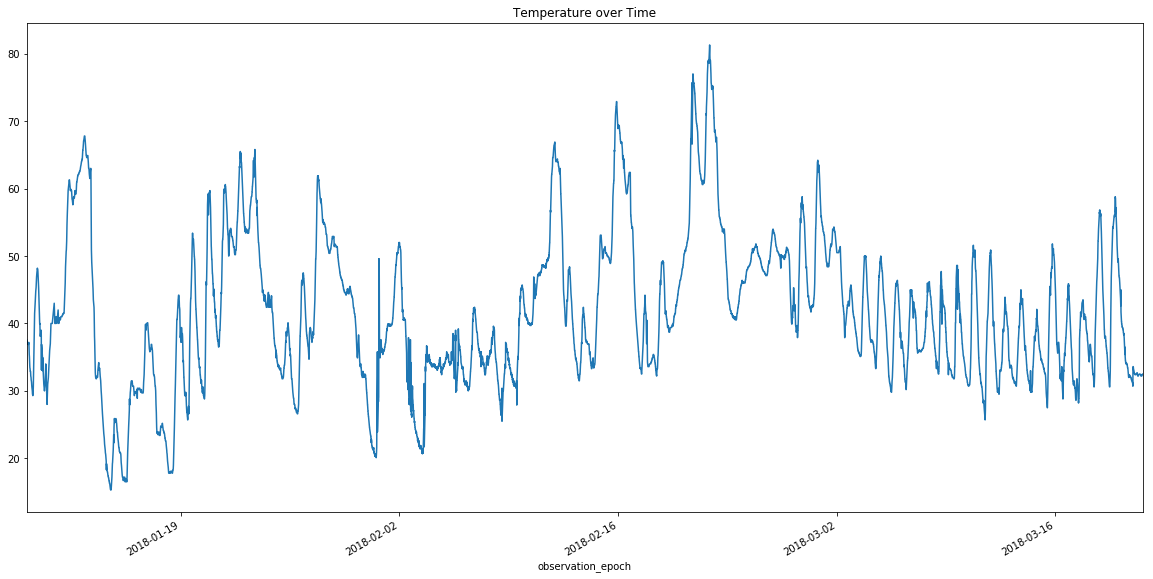

In [101]:
# plot temerature over time
df.temp_f.plot(title="Temperature over Time")

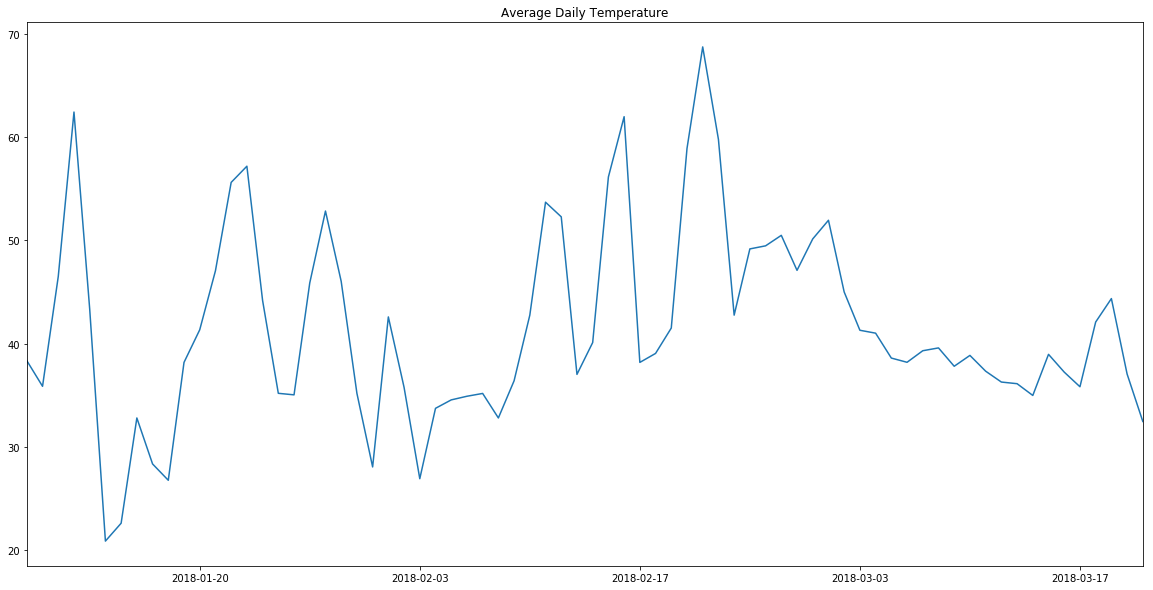

In [102]:
# plot the average daily temperature
df.groupby(df.index.date)['temp_f'].mean().plot(title="Average Daily Temperature")

In [104]:
# subset to the weather for just the past week
df_week = df.ix['2018-03-14':]

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


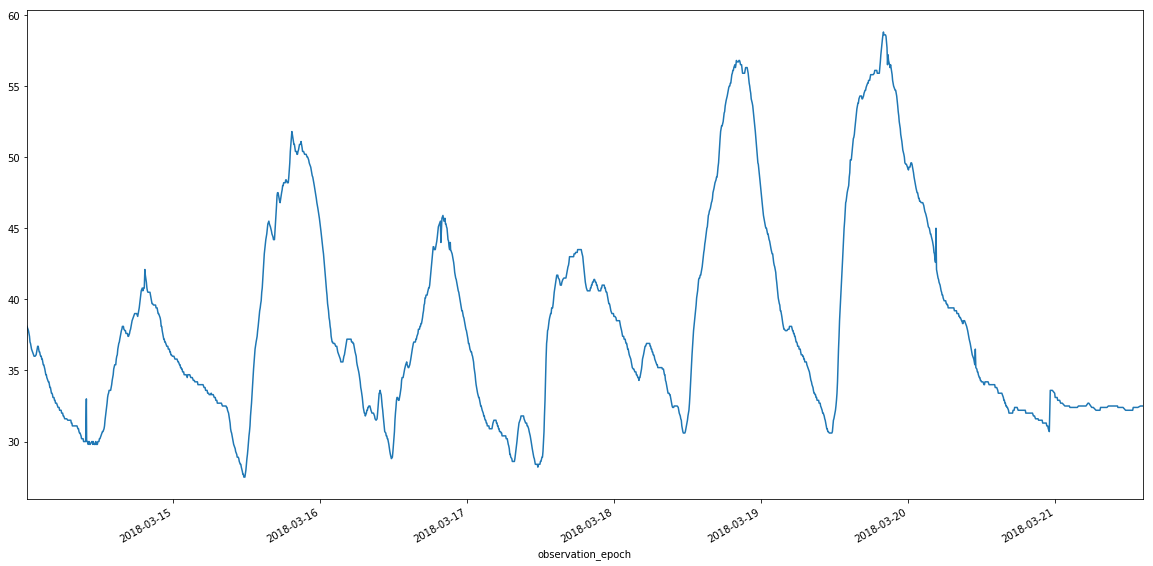

In [106]:
# plot temperatures over just the last week
df_week['temp_f'].plot()

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


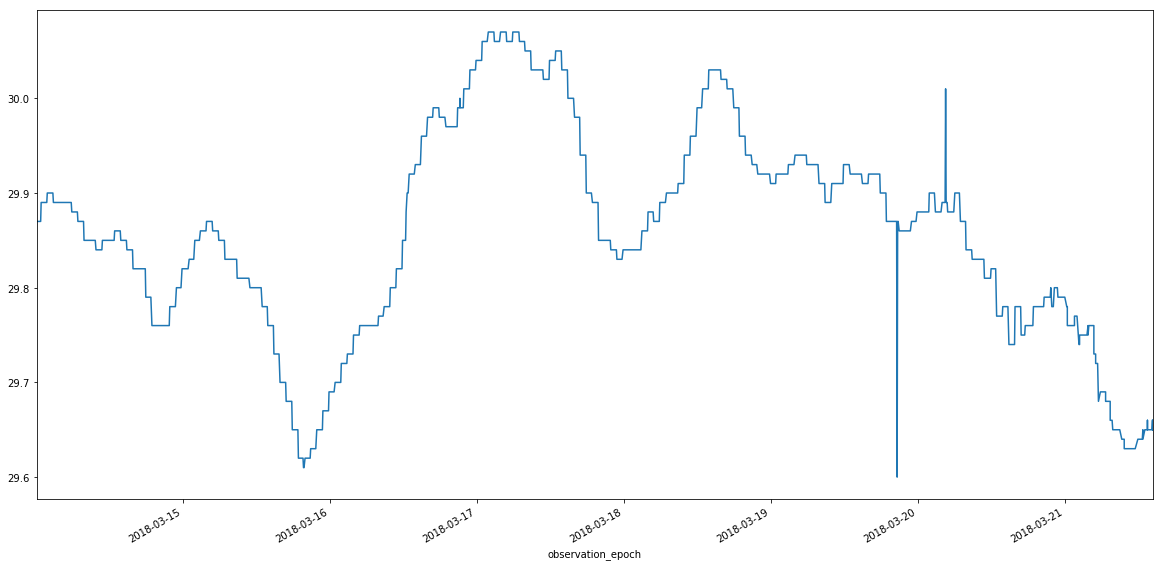

In [112]:
# convert pressure to numeric value
df_week.pressure_in = pd.to_numeric(df_week.pressure_in)

# plot the pressure over just the last week
df_week['pressure_in'].plot()